In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
PATH = "/home/paperspace/projects/caavo/with_valid_dataset/"
sz=128

In [4]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz),test_name='test')
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

In [5]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 81%|████████  | 767/950 [00:11<00:02, 66.97it/s, loss=7.12]

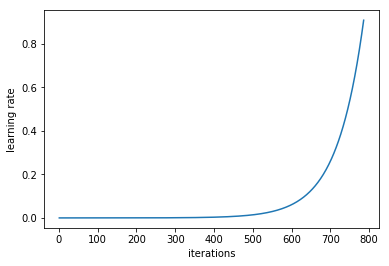

 81%|████████  | 767/950 [00:30<00:07, 25.55it/s, loss=7.12]

In [6]:
learn.sched.plot_lr()

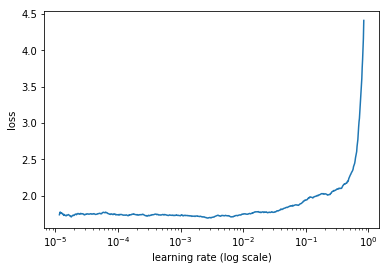

In [7]:
learn.sched.plot()

In [5]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [6]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [7]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms, test_name='test')
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [8]:
learn.fit(1e-2, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.596125   1.956655   0.382533  



[1.9566549, 0.3825334832072258]

In [9]:
learn.precompute=False

In [74]:
learn.fit(1e-2, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.765046   2.199572   0.329427  
    1      1.752632   2.199182   0.320312                   
    2      1.736335   2.168525   0.321894                   



[2.1685252, 0.3218936001261075]

In [75]:
learn.unfreeze()

In [76]:
lr=np.array([1e-4,1e-3,1e-2])

In [93]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.371284   1.972845   0.409412  
    1      1.363264   1.95151    0.415737                   
    2      1.288256   1.947993   0.422247                   
    3      1.276602   1.90089    0.425967                   
    4      1.242705   1.934669   0.420108                   
    5      1.179885   1.892373   0.437872                   
    6      1.171088   1.926887   0.437686                   



[1.9268874, 0.4376860111951828]

In [94]:
learn.save('caavo_2_3')

In [95]:
learn.load('caavo_2_3')

In [16]:
data.classes

['0',
 '1',
 '10',
 '11',
 '12',
 '13',
 '14',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9']

In [17]:
data.test_ds.fnames

['test/n03615563_8390_0.jpg',
 'test/n03902756_1779_0.jpg',
 'test/n04370048_25996_0.jpg',
 'test/n03112869_28009_0.jpg',
 'test/n03221540_1528_0.jpg',
 'test/n03398153_11071_0.jpg',
 'test/n04370456_8130_0.jpg',
 'test/n04350905_33556_0.jpg',
 'test/n03844815_17008_0.jpg',
 'test/n04368496_16342_0.jpg',
 'test/n04222307_2235_0.jpg',
 'test/n04350905_35909_0.jpg',
 'test/n04129766_231_1.jpg',
 'test/n02864504_3359_0.jpg',
 'test/n02780704_1672_1.jpg',
 'test/n02957008_19718_0.jpg',
 'test/n03057841_605_0.jpg',
 'test/n03010795_4519_0.jpg',
 'test/n04350905_24865_0.jpg',
 'test/n04615644_2034_0.jpg',
 'test/n02854926_4546_0.jpg',
 'test/n04021028_21027_0.jpg',
 'test/n03902756_4757_0.jpg',
 'test/n03384891_6271_0.jpg',
 'test/n04350905_7143_0.jpg',
 'test/n04602956_3082_0.jpg',
 'test/n02780704_1983_0.jpg',
 'test/n04531873_9271_0.jpg',
 'test/n03885788_11925_0.jpg',
 'test/n04350905_28358_0.jpg',
 'test/n02726017_1043_0.jpg',
 'test/n04046277_3889_0.jpg',
 'test/n03817647_4631_0.jpg',


In [25]:
#wrong one
log_preds = learn.predict(is_test=True)
probs = np.exp(log_preds)

In [96]:
log_preds = learn.predict(is_test=True)
log_preds.shape

(21273, 15)

In [97]:
log_preds = np.argmax(log_preds,axis=1)

In [98]:
log_preds.shape

(21273,)

In [47]:
log_preds

array([8, 7, 9, ..., 4, 9, 9])

In [83]:
#new one
log_preds

array([5, 8, 5, ..., 4, 1, 9])

In [99]:
log_preds

array([ 5,  8,  1, ...,  4,  1, 11])

In [52]:
data.classes[3]

'11'

In [84]:
import pandas as pd

In [64]:
arr=[]
for i in range(log_preds.shape[0]):
    arr.append(data.classes[log_preds[i]])
arr

['3',
 '2',
 '4',
 '12',
 '3',
 '8',
 '3',
 '2',
 '3',
 '9',
 '2',
 '9',
 '4',
 '3',
 '4',
 '2',
 '3',
 '6',
 '9',
 '6',
 '2',
 '10',
 '2',
 '2',
 '9',
 '11',
 '4',
 '3',
 '12',
 '3',
 '6',
 '3',
 '6',
 '12',
 '10',
 '9',
 '13',
 '2',
 '6',
 '10',
 '9',
 '4',
 '4',
 '1',
 '4',
 '4',
 '1',
 '3',
 '2',
 '4',
 '9',
 '4',
 '10',
 '1',
 '10',
 '10',
 '4',
 '12',
 '3',
 '3',
 '3',
 '4',
 '2',
 '2',
 '6',
 '6',
 '6',
 '2',
 '1',
 '2',
 '12',
 '1',
 '10',
 '2',
 '4',
 '1',
 '1',
 '4',
 '3',
 '4',
 '2',
 '6',
 '12',
 '3',
 '13',
 '10',
 '10',
 '3',
 '3',
 '10',
 '9',
 '12',
 '3',
 '4',
 '2',
 '9',
 '1',
 '3',
 '9',
 '4',
 '2',
 '8',
 '4',
 '2',
 '3',
 '1',
 '2',
 '10',
 '2',
 '12',
 '1',
 '4',
 '9',
 '10',
 '9',
 '6',
 '4',
 '8',
 '9',
 '6',
 '9',
 '4',
 '10',
 '3',
 '12',
 '3',
 '2',
 '4',
 '1',
 '9',
 '3',
 '4',
 '6',
 '4',
 '4',
 '4',
 '4',
 '4',
 '9',
 '12',
 '2',
 '1',
 '10',
 '6',
 '12',
 '2',
 '1',
 '1',
 '1',
 '12',
 '2',
 '6',
 '12',
 '4',
 '12',
 '4',
 '1',
 '2',
 '5',
 '1',
 '4',
 '1

In [85]:
#new one
arr=[]
for i in range(log_preds.shape[0]):
    arr.append(data.classes[log_preds[i]])
arr

['13',
 '3',
 '13',
 '12',
 '3',
 '8',
 '3',
 '9',
 '3',
 '9',
 '9',
 '9',
 '4',
 '10',
 '4',
 '2',
 '3',
 '6',
 '9',
 '2',
 '2',
 '1',
 '2',
 '2',
 '9',
 '11',
 '4',
 '3',
 '12',
 '3',
 '6',
 '5',
 '6',
 '12',
 '10',
 '9',
 '13',
 '3',
 '11',
 '10',
 '1',
 '8',
 '6',
 '6',
 '4',
 '4',
 '8',
 '10',
 '2',
 '4',
 '9',
 '4',
 '10',
 '8',
 '10',
 '10',
 '6',
 '12',
 '10',
 '3',
 '3',
 '4',
 '4',
 '2',
 '6',
 '4',
 '6',
 '9',
 '1',
 '3',
 '1',
 '1',
 '10',
 '10',
 '10',
 '10',
 '1',
 '1',
 '3',
 '4',
 '2',
 '11',
 '12',
 '3',
 '2',
 '1',
 '5',
 '13',
 '9',
 '10',
 '9',
 '12',
 '3',
 '4',
 '2',
 '9',
 '13',
 '3',
 '9',
 '1',
 '2',
 '8',
 '4',
 '6',
 '14',
 '2',
 '9',
 '10',
 '6',
 '12',
 '4',
 '6',
 '9',
 '12',
 '9',
 '6',
 '4',
 '8',
 '9',
 '6',
 '9',
 '4',
 '10',
 '3',
 '12',
 '3',
 '13',
 '4',
 '13',
 '9',
 '13',
 '4',
 '2',
 '6',
 '4',
 '4',
 '4',
 '4',
 '3',
 '12',
 '6',
 '12',
 '11',
 '2',
 '12',
 '2',
 '10',
 '4',
 '1',
 '12',
 '2',
 '2',
 '12',
 '4',
 '12',
 '6',
 '4',
 '2',
 '5',
 '

In [100]:
arr=[]
for i in range(log_preds.shape[0]):
    arr.append(data.classes[log_preds[i]])
arr

['13',
 '3',
 '1',
 '12',
 '3',
 '8',
 '10',
 '9',
 '3',
 '9',
 '9',
 '9',
 '4',
 '10',
 '4',
 '2',
 '6',
 '6',
 '9',
 '2',
 '2',
 '10',
 '2',
 '9',
 '9',
 '7',
 '4',
 '3',
 '12',
 '10',
 '6',
 '10',
 '6',
 '12',
 '10',
 '9',
 '13',
 '3',
 '0',
 '10',
 '1',
 '8',
 '6',
 '6',
 '4',
 '8',
 '8',
 '10',
 '2',
 '4',
 '9',
 '4',
 '10',
 '1',
 '10',
 '10',
 '2',
 '12',
 '7',
 '3',
 '10',
 '4',
 '4',
 '4',
 '6',
 '4',
 '6',
 '9',
 '1',
 '3',
 '6',
 '1',
 '10',
 '10',
 '10',
 '10',
 '1',
 '1',
 '3',
 '6',
 '2',
 '11',
 '12',
 '3',
 '13',
 '1',
 '11',
 '13',
 '6',
 '10',
 '9',
 '12',
 '9',
 '4',
 '2',
 '9',
 '2',
 '3',
 '9',
 '1',
 '2',
 '8',
 '4',
 '6',
 '14',
 '6',
 '9',
 '10',
 '10',
 '12',
 '4',
 '6',
 '9',
 '12',
 '9',
 '6',
 '4',
 '8',
 '9',
 '6',
 '9',
 '4',
 '10',
 '3',
 '12',
 '7',
 '13',
 '4',
 '13',
 '9',
 '6',
 '4',
 '2',
 '6',
 '4',
 '4',
 '4',
 '4',
 '3',
 '12',
 '6',
 '12',
 '5',
 '2',
 '12',
 '1',
 '10',
 '4',
 '1',
 '12',
 '2',
 '2',
 '12',
 '4',
 '12',
 '6',
 '1',
 '8',
 '5',
 

In [101]:
df2 = pd.DataFrame(arr)

In [102]:
df2.head()

,0
0,13
1,3
2,1
3,12
4,3


In [103]:
df2.insert(0,'image_name',[ item[5:] for item in data.test_ds.fnames ] )

In [104]:
df2.head()

,image_name,0
0,n03615563_8390_0.jpg,13
1,n03902756_1779_0.jpg,3
2,n04370048_25996_0.jpg,1
3,n03112869_28009_0.jpg,12
4,n03221540_1528_0.jpg,3


In [105]:
df2.columns = ['image_name', 'category']

In [106]:
df2.head()

,image_name,category
0,n03615563_8390_0.jpg,13
1,n03902756_1779_0.jpg,3
2,n04370048_25996_0.jpg,1
3,n03112869_28009_0.jpg,12
4,n03221540_1528_0.jpg,3


In [107]:
df2.to_csv('ANS3.csv',index=False)

In [121]:
learn.load('caavo_2_3')

In [132]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.172242   1.956882   0.422526  
    1      1.180492   1.913352   0.436756                   
    2      1.119055   1.92889    0.446708                   
    3      1.163991   1.932494   0.443917                   
    4      1.095295   1.934552   0.446615                   
    5      1.00317    1.994037   0.450707                    
    6      0.963519   1.959744   0.453311                    



[1.9597443, 0.4533110111951828]

In [155]:
learn.save('caavo_2_5')

In [144]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      1.039096   1.962614   0.458054  
    1      1.033576   1.979503   0.46131                     
    2      0.964347   2.002091   0.471075                    
    3      1.043156   2.017644   0.466053                    
    4      0.924182   2.032051   0.463914                    
    5      0.88897    2.070672   0.465681                    
    6      0.845514   2.047883   0.469773                    



[2.0478833, 0.4697730665405591]

In [159]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.83205    2.068839   0.459356  
    1      0.92136    2.094705   0.456101                    
    2      0.823077   2.104912   0.46782                     
    3      0.903964   2.045883   0.464844                    
    4      0.808618   2.120867   0.469122                    
    5      0.736446   2.214633   0.460193                    
    6      0.682079   2.189755   0.459821                    



[2.1897554, 0.4598214278618495]

In [145]:
log_preds = learn.predict(is_test=True)
log_preds.shape

(21273, 15)

In [146]:
log_preds = np.argmax(log_preds,axis=1)

In [147]:
log_preds.shape

(21273,)

In [148]:
log_preds

array([ 8,  8, 11, ...,  4, 13, 11])

In [149]:
arr=[]
for i in range(log_preds.shape[0]):
    arr.append(data.classes[log_preds[i]])
arr

['3',
 '3',
 '6',
 '12',
 '3',
 '8',
 '10',
 '9',
 '3',
 '3',
 '9',
 '9',
 '4',
 '10',
 '4',
 '2',
 '5',
 '6',
 '9',
 '2',
 '4',
 '10',
 '2',
 '4',
 '9',
 '7',
 '4',
 '14',
 '12',
 '10',
 '6',
 '10',
 '6',
 '12',
 '10',
 '9',
 '13',
 '3',
 '11',
 '11',
 '1',
 '4',
 '6',
 '6',
 '4',
 '4',
 '10',
 '3',
 '3',
 '4',
 '9',
 '4',
 '10',
 '8',
 '10',
 '10',
 '2',
 '12',
 '7',
 '3',
 '3',
 '4',
 '4',
 '4',
 '1',
 '12',
 '2',
 '9',
 '1',
 '3',
 '6',
 '1',
 '10',
 '1',
 '10',
 '10',
 '1',
 '1',
 '3',
 '6',
 '2',
 '1',
 '12',
 '3',
 '13',
 '1',
 '11',
 '3',
 '6',
 '10',
 '9',
 '12',
 '9',
 '4',
 '2',
 '9',
 '2',
 '3',
 '9',
 '1',
 '2',
 '8',
 '4',
 '4',
 '14',
 '6',
 '9',
 '10',
 '1',
 '12',
 '1',
 '6',
 '3',
 '12',
 '9',
 '6',
 '6',
 '8',
 '9',
 '6',
 '9',
 '8',
 '10',
 '3',
 '12',
 '3',
 '13',
 '4',
 '13',
 '9',
 '6',
 '4',
 '2',
 '6',
 '4',
 '4',
 '4',
 '4',
 '10',
 '12',
 '6',
 '12',
 '8',
 '6',
 '12',
 '1',
 '10',
 '1',
 '1',
 '12',
 '6',
 '6',
 '12',
 '4',
 '4',
 '1',
 '1',
 '8',
 '5',
 '12

In [150]:
df3 = pd.DataFrame(arr)

In [151]:
df3.insert(0,'image_name',[ item[5:] for item in data.test_ds.fnames ] )

In [152]:
df3.columns = ['image_name', 'category']

In [153]:
df3.head()

,image_name,category
0,n03615563_8390_0.jpg,3
1,n03902756_1779_0.jpg,3
2,n04370048_25996_0.jpg,6
3,n03112869_28009_0.jpg,12
4,n03221540_1528_0.jpg,3


In [154]:
df3.to_csv('ANS6.csv',index=False)

In [17]:
arch=resnet34
sz=128
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [18]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms, test_name='test')
learn = ConvLearner.pretrained(arch, data, precompute=True,ps=0.6)

In [19]:
learn.fit(1e-2, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.703183   2.033688   0.375744  



[2.0336876, 0.3757440472642581]

In [20]:
learn.precompute=False

In [21]:
learn.fit(1e-2, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.659341   2.001862   0.382533  
    1      1.659051   1.983472   0.38923                    
    2      1.63528    1.941971   0.391834                   



[1.9419714, 0.3918340777357419]

In [22]:
learn.unfreeze()

In [23]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 81%|████████  | 768/950 [01:42<00:24,  7.49it/s, loss=7.36]

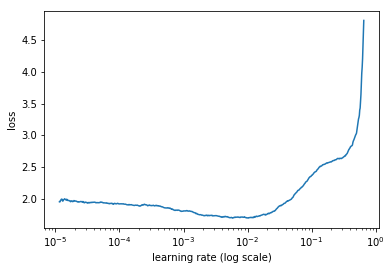

In [24]:
learn.sched.plot()

In [12]:
lr=np.array([1e-4,1e-3,1e-2])

In [26]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

  4%|▍         | 36/950 [00:05<02:10,  6.99it/s, loss=1.94]

Exception in thread Thread-20:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                   
    0      1.508941   1.920811   0.405227  
    1      1.392333   1.799621   0.43843                    
    2      1.328788   1.760613   0.459263                   
    3      1.29796    1.747788   0.466425                   
    4      1.244588   1.657996   0.493769                   
    5      1.171026   1.66021    0.501581                   
    6      1.162311   1.661972   0.502883                   



[1.6619719, 0.5028831834594408]

In [27]:
learn.save('caavo_2_10')

In [28]:
learn.load('caavo_2_10')

In [29]:
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=15), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.138247   1.66165    0.500279  
    1      1.145613   1.585424   0.51981                    
    2      1.073356   1.602149   0.521112                   
    3      1.101292   1.698431   0.506789                   
    4      1.041966   1.613317   0.523717                    
    5      0.96441    1.584316   0.535435                    
    6      0.941024   1.580588   0.536737                    
    7      0.997593   1.619489   0.531808                    
    8      0.956742   1.587841   0.545201                    
    9      0.907136   1.615319   0.553013                    
    10     0.840544   1.604312   0.555432                    
    11     0.817881   1.612601   0.559524                    
    12     0.744261   1.646201   0.548456                    
    13     0.737098   1.643849   0.550223                    
    14     0.719859   1.667853   0.54827                     



[1.6678532, 0.5482700889309248]

In [30]:
learn.save('caavo_2_11')

In [31]:
learn.fit(lr,3,cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.786902   1.643919   0.543248  
    1      0.789048   1.61522    0.54455                     
    2      0.687713   1.655861   0.549107                    
    3      0.770735   1.662973   0.553664                    
    4      0.73051    1.680177   0.55106                     
    5      0.65427    1.708665   0.554781                    
    6      0.620825   1.735779   0.549107                    



[1.7357788, 0.5491071417927742]

In [179]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.10033    1.642372   0.513951  
    1      1.109294   1.607808   0.522414                   
    2      0.994198   1.603002   0.532831                    
    3      1.079327   1.614945   0.520461                    
    4      0.972432   1.560719   0.532831                    
    5      0.927029   1.587264   0.53869                     
    6      0.904609   1.574111   0.53869                     



[1.5741106, 0.5386904751261076]

In [180]:
learn.save('caavo_2_7')

In [181]:
learn.load('caavo_2_7')

In [191]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.919342   1.578441   0.536086  
    1      0.957745   1.603818   0.534133                    
    2      0.825132   1.609289   0.531343                    
    3      0.901866   1.61382    0.538969                    
    4      0.81104    1.620696   0.539342                    
    5      0.769923   1.644314   0.548456                    
    6      0.745644   1.639149   0.555618                    



[1.6391493, 0.5556175584594408]

In [192]:
learn.save('caavo_2_8')

In [10]:
learn.load('caavo_2_8')

In [15]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.763768   1.639937   0.545852  
    1      0.791987   1.669363   0.535435                    
    2      0.716492   1.684109   0.536086                    
    3      0.788736   1.68887    0.529204                    
    4      0.695504   1.69801    0.545852                    
    5      0.64645    1.749793   0.537016                    
    6      0.587499   1.722767   0.54827                     



[1.7227674, 0.5482700889309248]

In [13]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.661914   1.680798   0.555618  
    1      0.653363   1.728115   0.539993                    
    2      0.640843   1.694064   0.545201                    
    3      0.655318   1.711988   0.541295                    
    4      0.633081   1.718104   0.545201                    
    5      0.638774   1.716931   0.54455                     
    6      0.634927   1.723474   0.546503                    



[1.7234744, 0.5465029751261076]

In [16]:
learn.save('caavo_2_9')

In [ ]:
learn.load('caavo_2_9')

In [203]:
learn.fit(lr, 5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.849116   1.715987   0.539993  
    1      0.807156   1.717654   0.529576                    
    2      0.771935   1.715384   0.544364                    
    3      0.750161   1.709694   0.540086                    
    4      0.712362   1.756416   0.5359                      



[1.7564163, 0.535900297264258]

In [ ]:
learn.save('caavo_2_9')

In [ ]:
learn.load('caavo_2_9')

In [194]:
log_preds = learn.predict(is_test=True)
log_preds.shape

(21273, 15)

In [195]:
log_preds = np.argmax(log_preds,axis=1)

In [196]:
log_preds

array([ 5,  8,  9, ...,  4, 13, 11])

In [197]:
arr=[]
for i in range(log_preds.shape[0]):
    arr.append(data.classes[log_preds[i]])
arr

['13',
 '3',
 '4',
 '12',
 '3',
 '8',
 '10',
 '9',
 '3',
 '3',
 '9',
 '9',
 '4',
 '3',
 '4',
 '7',
 '14',
 '6',
 '9',
 '9',
 '6',
 '10',
 '9',
 '9',
 '9',
 '7',
 '4',
 '14',
 '12',
 '9',
 '6',
 '10',
 '6',
 '8',
 '10',
 '9',
 '13',
 '3',
 '11',
 '11',
 '1',
 '8',
 '6',
 '4',
 '8',
 '4',
 '10',
 '3',
 '3',
 '4',
 '9',
 '4',
 '10',
 '3',
 '10',
 '10',
 '10',
 '12',
 '10',
 '3',
 '3',
 '4',
 '4',
 '4',
 '6',
 '11',
 '6',
 '9',
 '1',
 '1',
 '6',
 '1',
 '10',
 '10',
 '3',
 '4',
 '10',
 '1',
 '3',
 '6',
 '2',
 '11',
 '12',
 '3',
 '2',
 '1',
 '5',
 '3',
 '2',
 '10',
 '9',
 '6',
 '3',
 '4',
 '3',
 '9',
 '2',
 '3',
 '9',
 '1',
 '2',
 '8',
 '4',
 '4',
 '14',
 '4',
 '9',
 '10',
 '6',
 '6',
 '12',
 '1',
 '3',
 '12',
 '9',
 '6',
 '6',
 '8',
 '9',
 '6',
 '9',
 '4',
 '10',
 '3',
 '12',
 '3',
 '7',
 '4',
 '3',
 '9',
 '12',
 '4',
 '2',
 '4',
 '4',
 '4',
 '4',
 '4',
 '10',
 '5',
 '6',
 '12',
 '0',
 '7',
 '12',
 '1',
 '10',
 '4',
 '1',
 '12',
 '8',
 '6',
 '8',
 '4',
 '1',
 '4',
 '4',
 '8',
 '5',
 '12',
 

In [198]:
df3 = pd.DataFrame(arr)

In [199]:
df3.insert(0,'image_name',[ item[5:] for item in data.test_ds.fnames ] )

In [200]:
df3.columns = ['image_name', 'category']

In [201]:
df3.head()

,image_name,category
0,n03615563_8390_0.jpg,13
1,n03902756_1779_0.jpg,3
2,n04370048_25996_0.jpg,4
3,n03112869_28009_0.jpg,12
4,n03221540_1528_0.jpg,3


In [202]:
df3.to_csv('ANS9.csv',index=False)